<a href="https://colab.research.google.com/github/Raihandany/PCVK_Ganjil_2023/blob/main/Week3_PCVK_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


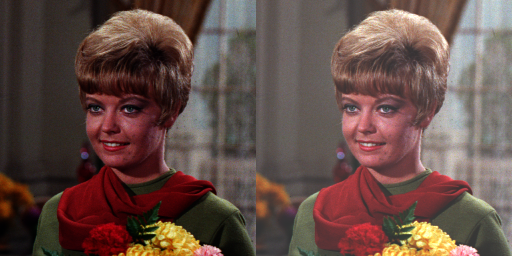

In [22]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/prac_week3/img/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara
#brightness_image

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


# **TASK**

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: -250


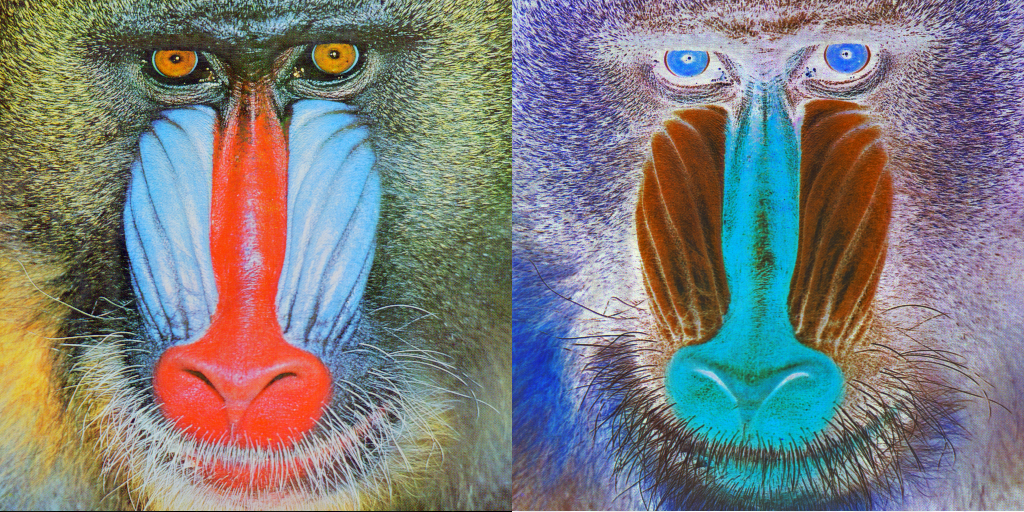

In [21]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/prac_week3/img/mandrill.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
#for y in range(original.shape[0]):
#  for x in range(original.shape[1]):
#    for c in range(original.shape[2]):
#      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan [-255 - 255]: 60
Masukkan nilai kontras [1.0 - 1.0]: 1.5


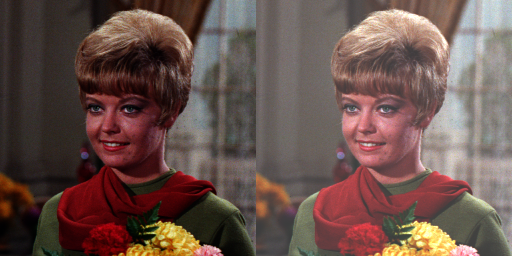

In [34]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import math
import matplotlib.pyplot as plt

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan nilai kontras [1.0 - 1.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/prac_week3/img/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      new_value = int(original[y,x,c] * contrast + brightness)
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=(contrast*math.log(1+brightness)))

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)
